In [1]:
import re
import nltk
import pandas as pd
import numpy as np

nltk.download('stopwords')
lst_stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Reading data

In [36]:
# The data set: “Natural Language Processing with Disaster Tweets” data set
# https://www.kaggle.com/competitions/nlp-getting-started/data 
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [37]:
df.shape, df_test.shape

((7613, 5), (3263, 4))

# Cleaning and pre-processing

In [4]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and   
    # characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    
    
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [5]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [38]:
df["text_clean"] = df["text"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))

df_test["text_clean"] = df_test["text"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))

df.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...


# Bag of Words vectorization

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
#bag of words
def get_bag_of_words( docs):

    vec = CountVectorizer()
    vectors = vec.fit_transform(docs)
    words_list = vec.get_feature_names()
    bag_of_words = np.zeros([len(docs), len(words_list)])
    
    for i in range(len(docs)):
        bag_of_words[i] = vectors[i].toarray()[0]
    return bag_of_words.astype(int)

get_bag_of_words(df['text_clean'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# TFIDF vectorization

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
features= tfidf_vectorizer.fit_transform(df["text_clean"])
df_features= pd.DataFrame(features.todense(), columns = tfidf_vectorizer.get_feature_names_out())

features_test= tfidf_vectorizer.transform(df_test["text_clean"])
df_features_test= pd.DataFrame(features_test.todense(), columns = tfidf_vectorizer.get_feature_names_out())

In [9]:
df_features

,0011,001116,0025,005225,010156,010217,0104,010401,0106,0111,...,ûïwhen,ûïymcglaun,ûïyou,ûò,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûûif
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.0,0.0,0.0,0.0,0.0,0.428471,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Wordcloud on TFIDF features

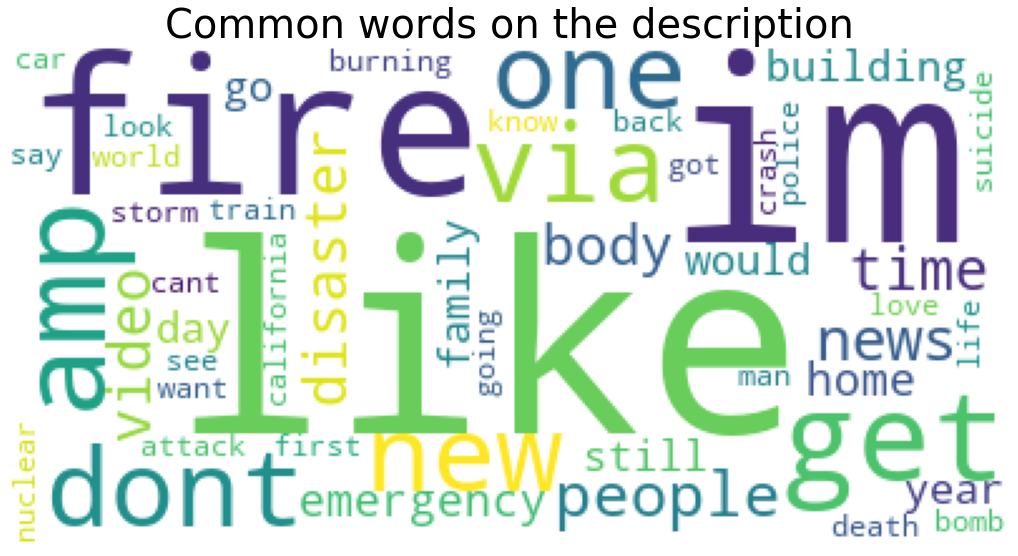

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(18,18))
cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(df_features.T.sum(axis=1))
plt.axis('off')
plt.title("Common words on the description",fontsize=40)
plt.imshow(cloud)

# 2 Dimensional PCA on TFIDF vectors separated by label

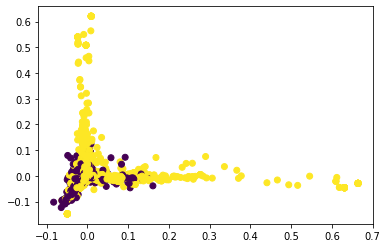

In [20]:
pca = PCA(n_components=3).fit(df_features)
data2D = pca.transform(df_features)
plt.scatter(data2D[:,0], data2D[:,1], c=df.target)
plt.show()  

# 3 Dimensional PCA on TFIDF vectors separated by label

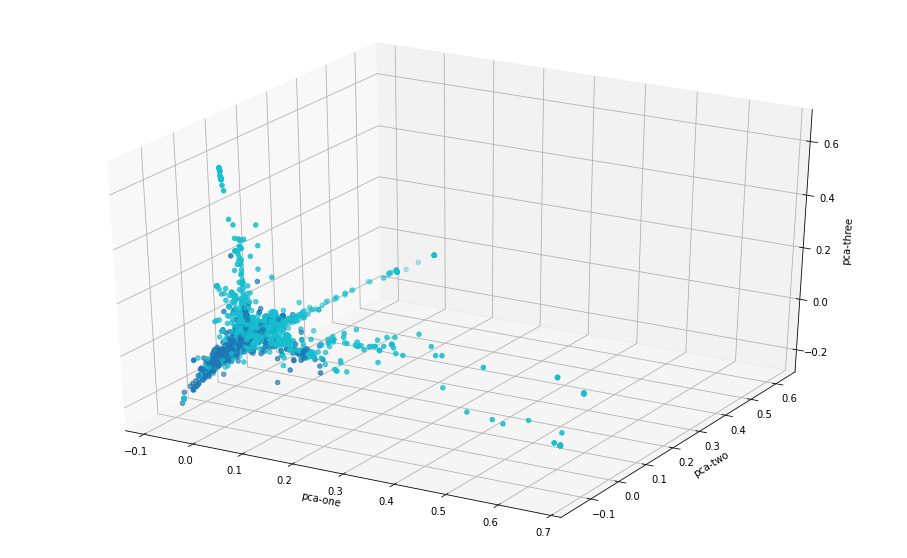

In [21]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=data2D[:,0], 
    ys=data2D[:,1], 
    zs=data2D[:,2], 
    c=df.target, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

# TSNE visualization on TFIDF features

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


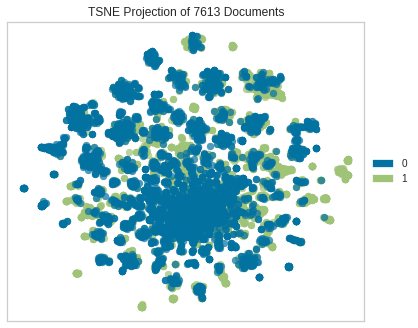

In [35]:
from yellowbrick.text import TSNEVisualizer

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(df_features, df.target)
tsne.show()

# DATA SPLIT


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features,df["target"],test_size=0.2,shuffle=True)

# TEXT CLASSIFICATION ON TFIDF VECTORS

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score

model = RandomForestClassifier()
model.fit(X_train, y_train)  
#Predict y value for test dataset
y_predict = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       854
           1       0.87      0.63      0.73       669

    accuracy                           0.79      1523
   macro avg       0.81      0.78      0.78      1523
weighted avg       0.81      0.79      0.79      1523

Confusion Matrix: [[789  65]
 [249 420]]
AUC: 0.8565153695088268
